In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("/home1/smaruj/akitaX1-analyses/figures/plot_styles/global_plotting_style.mplstyle")

from akita_utils.df_utils import (average_stat_over_targets, average_stat_over_backgrounds)
from akita_utils.format_io import h5_to_df
from scipy import stats

from helper import read_and_average_genomic_exp

### Reading disruption score data

In [2]:
# stat metric the analysis is based on
stat_of_analysis_interest = "SCD" # disruption score here (stands for squared contact difference)
data_dir = "/project/fudenber_735/akitaX1_analyses_data/genomic_disruption/disruption_by_permutation"

# reading data, averaging over targets
df = read_and_average_genomic_exp(data_dir, stat_to_average=stat_of_analysis_interest)

# reading additional independent permutation for model 0
df_m0_perm = h5_to_df(data_dir+"/model_0_perm.h5", ["SCD", "INS-16", "INS-64"], average=False)
df_m0_perm_tg = average_stat_over_targets(df_m0_perm, model_index=0, head_index=1, stat=stat_of_analysis_interest)

reading h5 files to dataframes
averaging over targets
collecting data for SCD


### Disruption score is correlated across random motif permutations

Text(0.71, 0.05, 'Pearson R = 0.9994')

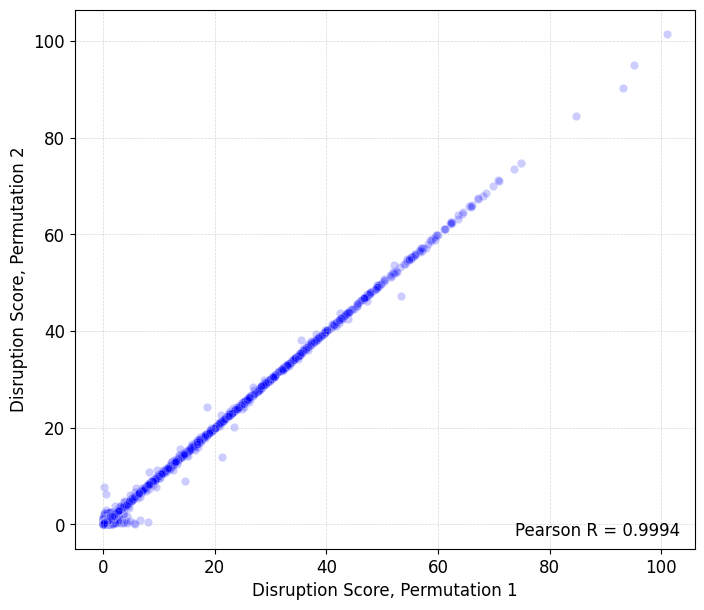

In [3]:
plt.figure(figsize=(8, 7))

plt.scatter(x=df[f"{stat_of_analysis_interest}_m0"], y=df_m0_perm_tg[f"{stat_of_analysis_interest}_m0"], alpha=0.2, edgecolors='w', linewidth=0.5, color='blue')

perm_corr = round(stats.pearsonr(df[f"{stat_of_analysis_interest}_m0"], df_m0_perm_tg[f"{stat_of_analysis_interest}_m0"]).statistic, 4)

plt.xlabel("Disruption Score, Permutation 1")
plt.ylabel("Disruption Score, Permutation 2")

plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.5)

plt.text(x=0.71, y=0.05, s=f"Pearson R = {perm_corr}", transform=plt.gca().transAxes, verticalalignment='top')

# plt.savefig("./plots/disruption_score_independent_permutations.pdf", format="pdf", bbox_inches="tight")

### Correlation between models

Text(0.71, 0.05, 'Pearson R = 0.9608')

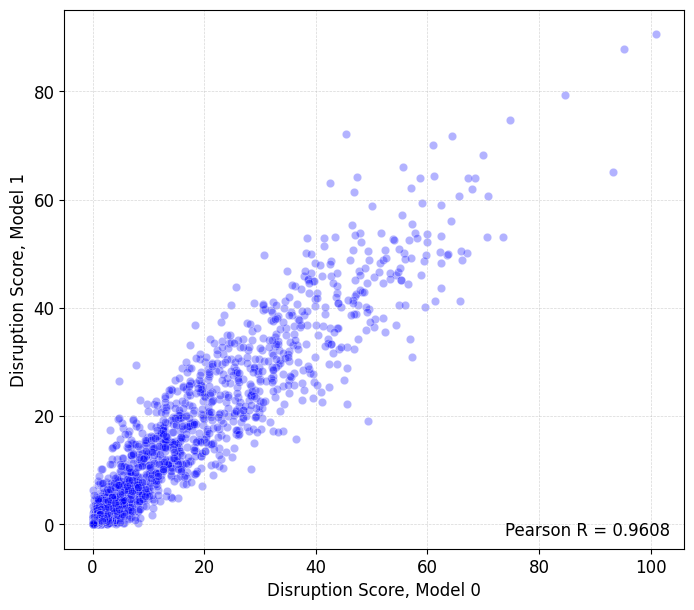

In [4]:
plt.figure(figsize=(8, 7))

plt.scatter(x=df[f"{stat_of_analysis_interest}_m0"], y=df[f"{stat_of_analysis_interest}_m1"], alpha=0.3, edgecolors='w', linewidth=0.5, color='blue')
m0_m1_corr = round(stats.pearsonr(df[f"{stat_of_analysis_interest}_m0"], df[f"{stat_of_analysis_interest}_m1"]).statistic, 4)

plt.xlabel("Disruption Score, Model 0")
plt.ylabel("Disruption Score, Model 1")

plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.5)

plt.text(x=0.71, y=0.05, s=f"Pearson R = {m0_m1_corr}", transform=plt.gca().transAxes, verticalalignment='top')

# plt.savefig("./plots/disruption_score_model0_model1.pdf", format="pdf", bbox_inches="tight")

### Correlations between all models

Text(0.5, 0.98, 'Correlations of disruption score between models')

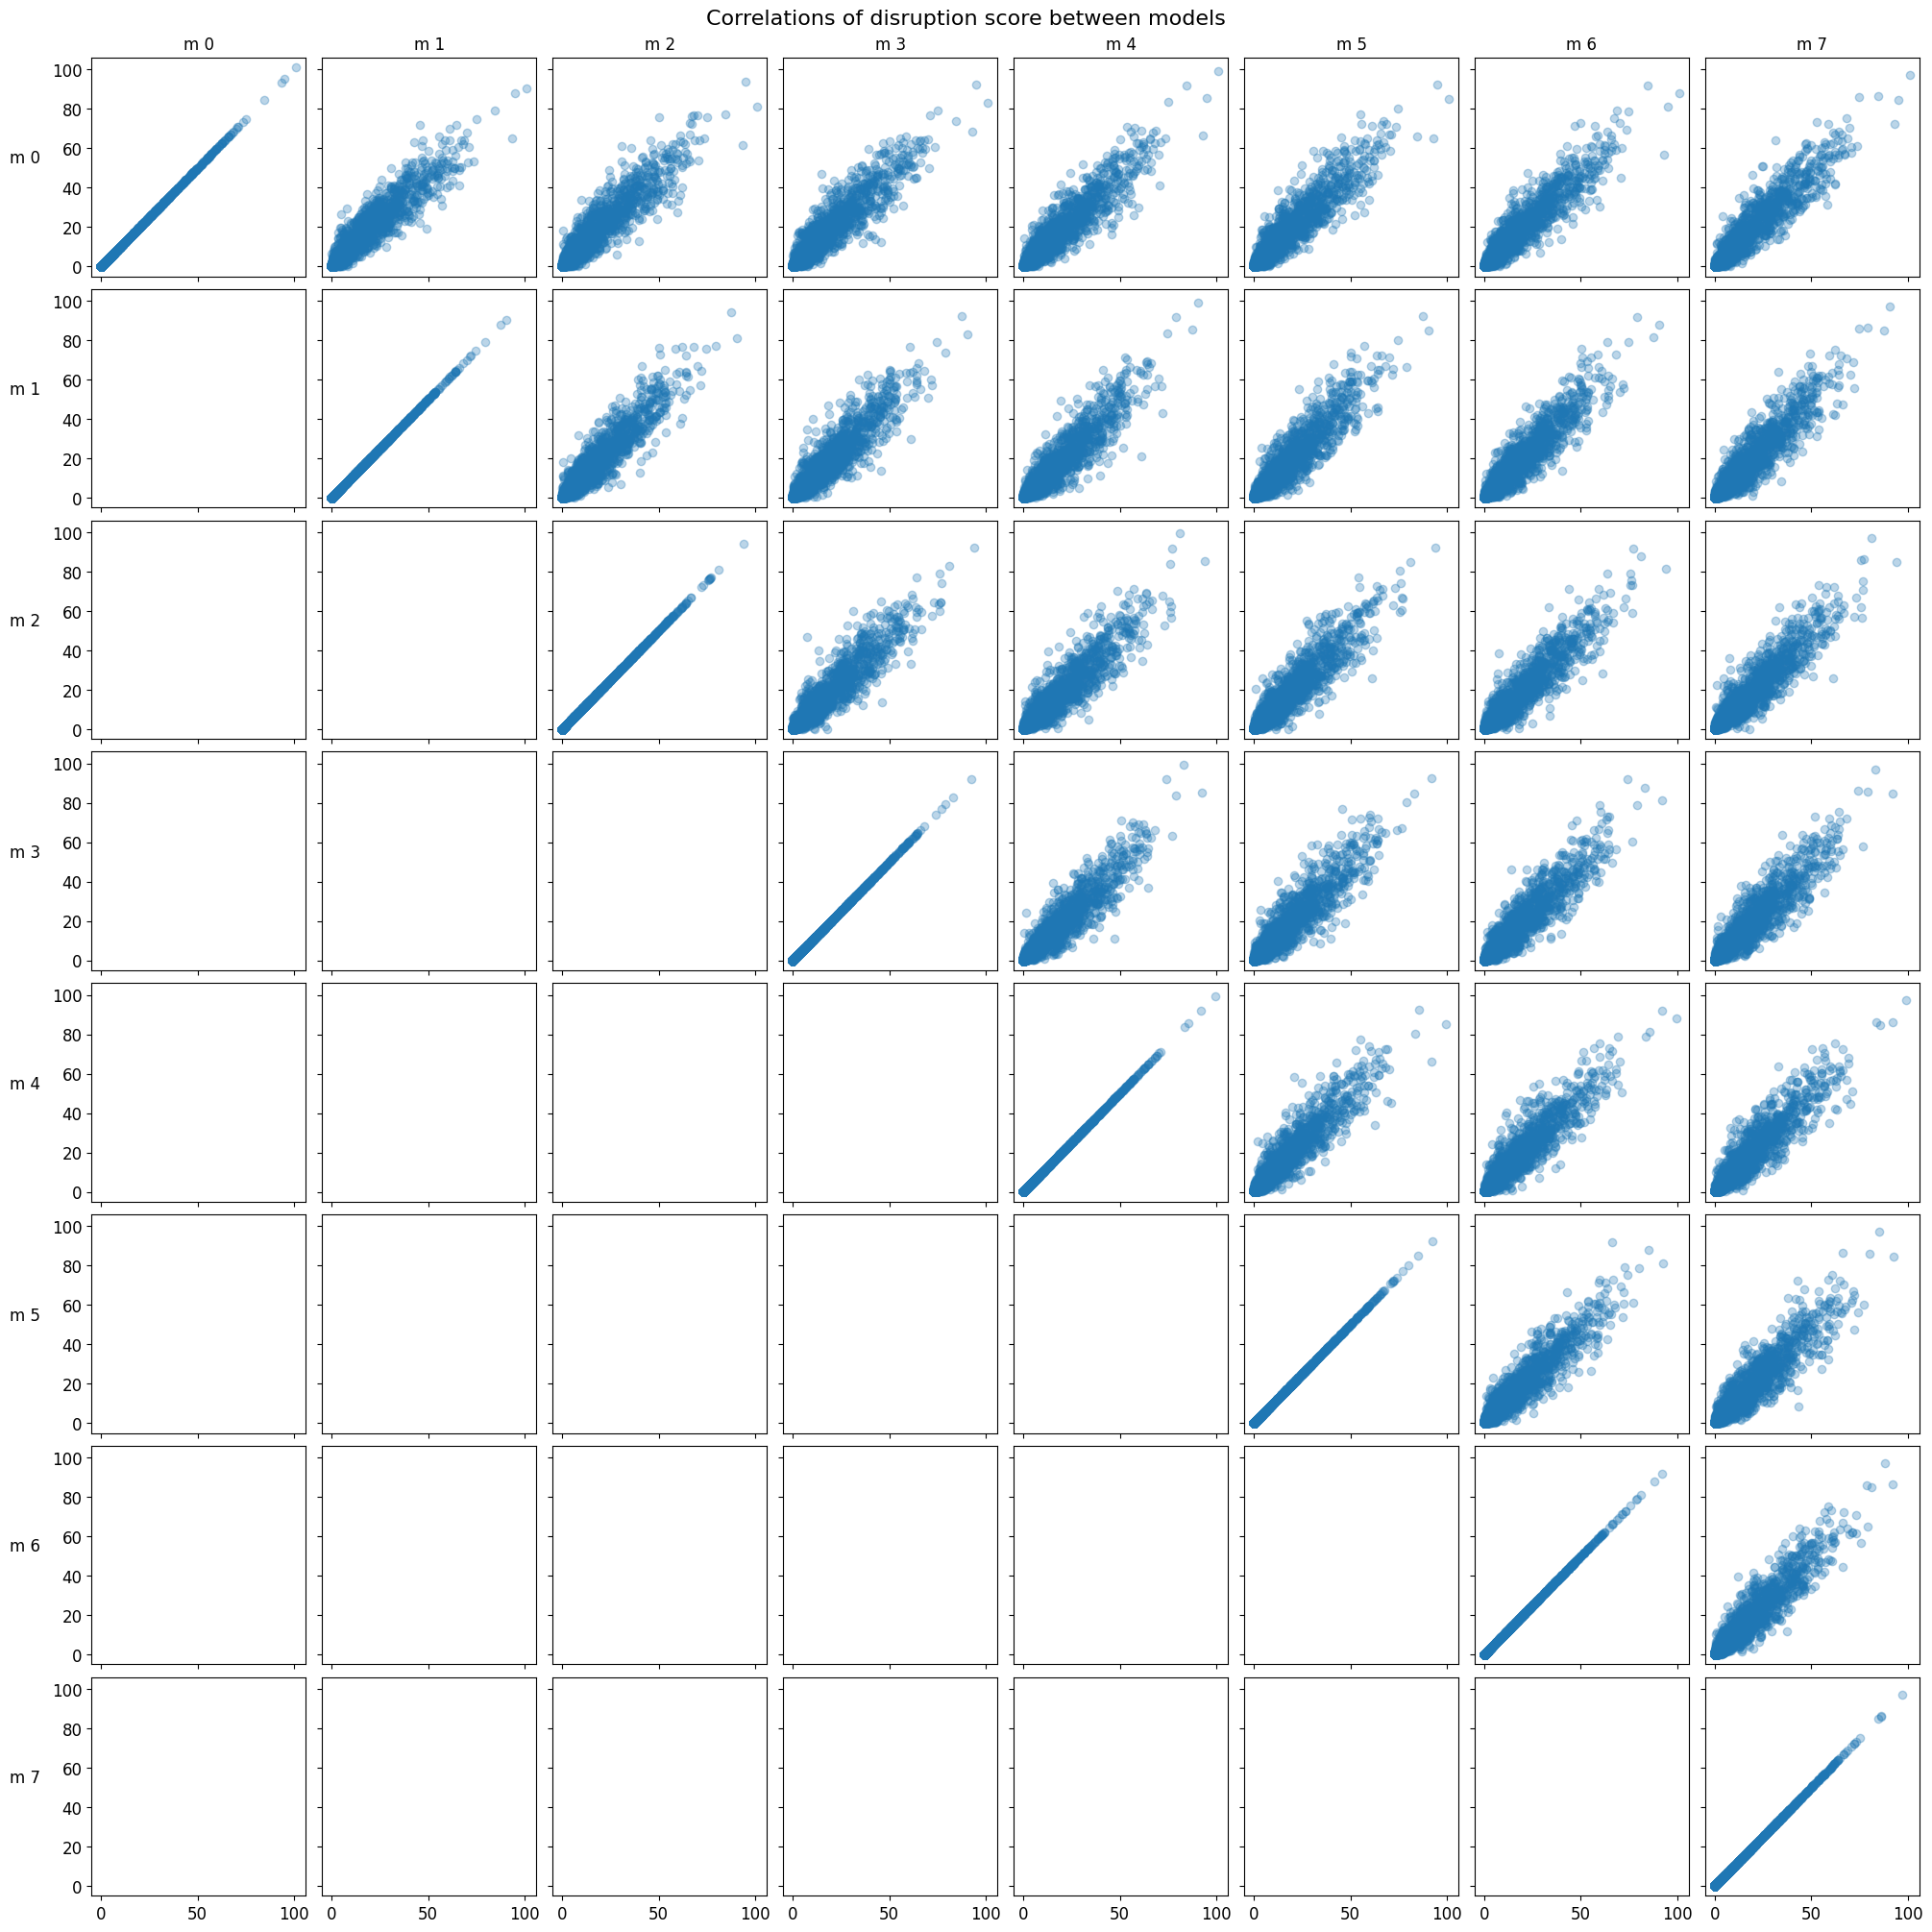

In [6]:
num_models = 8

models_corr_summary = np.zeros((num_models,num_models))

fig, axs = plt.subplots(num_models, num_models, figsize=(20, 20), sharex=True, sharey=True, layout="constrained")

for model_index_x in range(num_models):
    for model_index_y in range(num_models):
        if (model_index_y >= model_index_x):
            
            stat_x = np.array(df[f"{stat_of_analysis_interest}_m{model_index_x}"])
            stat_y = np.array(df[f"{stat_of_analysis_interest}_m{model_index_y}"])
            
            axs[model_index_x, model_index_y].scatter(x=stat_x, y=stat_y, alpha=0.3)
            
            models_corr_summary[model_index_x, model_index_y] = models_corr_summary[model_index_y, model_index_x] = stats.pearsonr(stat_x, stat_y).statistic
            
names = [f"m {i}" for i in range(num_models)]

for ax, col in zip(axs[0], names):
    ax.set_title(col, size=12)

for ax, row in zip(
    axs[:, 0],
    names,
):
    ax.set_ylabel(row, rotation=0, fontsize=12, labelpad=20)
    
fig.suptitle(f"Correlations of disruption score between models", fontsize=16)

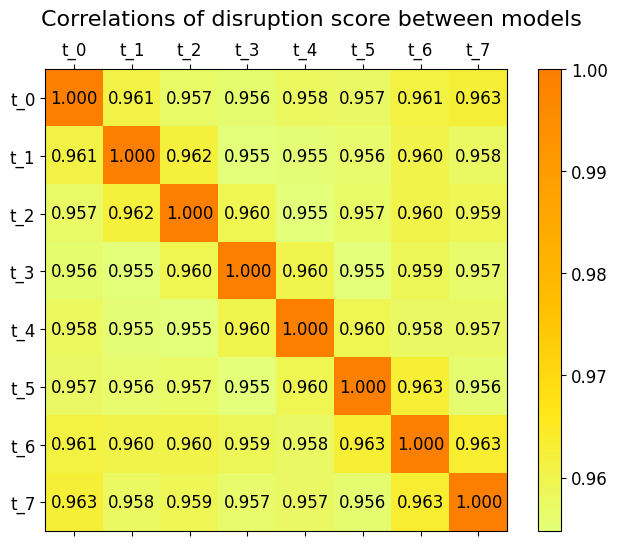

In [7]:
fig = plt.figure(figsize=(8, 6))

ax = fig.add_subplot(111)
cax = ax.matshow(models_corr_summary, cmap="Wistia", interpolation='nearest')
fig.colorbar(cax)

names = [f"t_{i}" for i in range(num_models)]

xaxis = np.arange(len(names))
ax.set_xticks(xaxis)
ax.set_yticks(xaxis)
ax.set_xticklabels(names)
ax.set_yticklabels(names)

for (x, y), value in np.ndenumerate(models_corr_summary):
    plt.text(x, y, f"{value:.3f}", va="center", ha="center")

fig.suptitle(f"Correlations of disruption score between models", fontsize=16)

fig.show()

### Correlations between targets for model 0

Text(0.5, 0.98, 'Correlations of disruption score between targets')

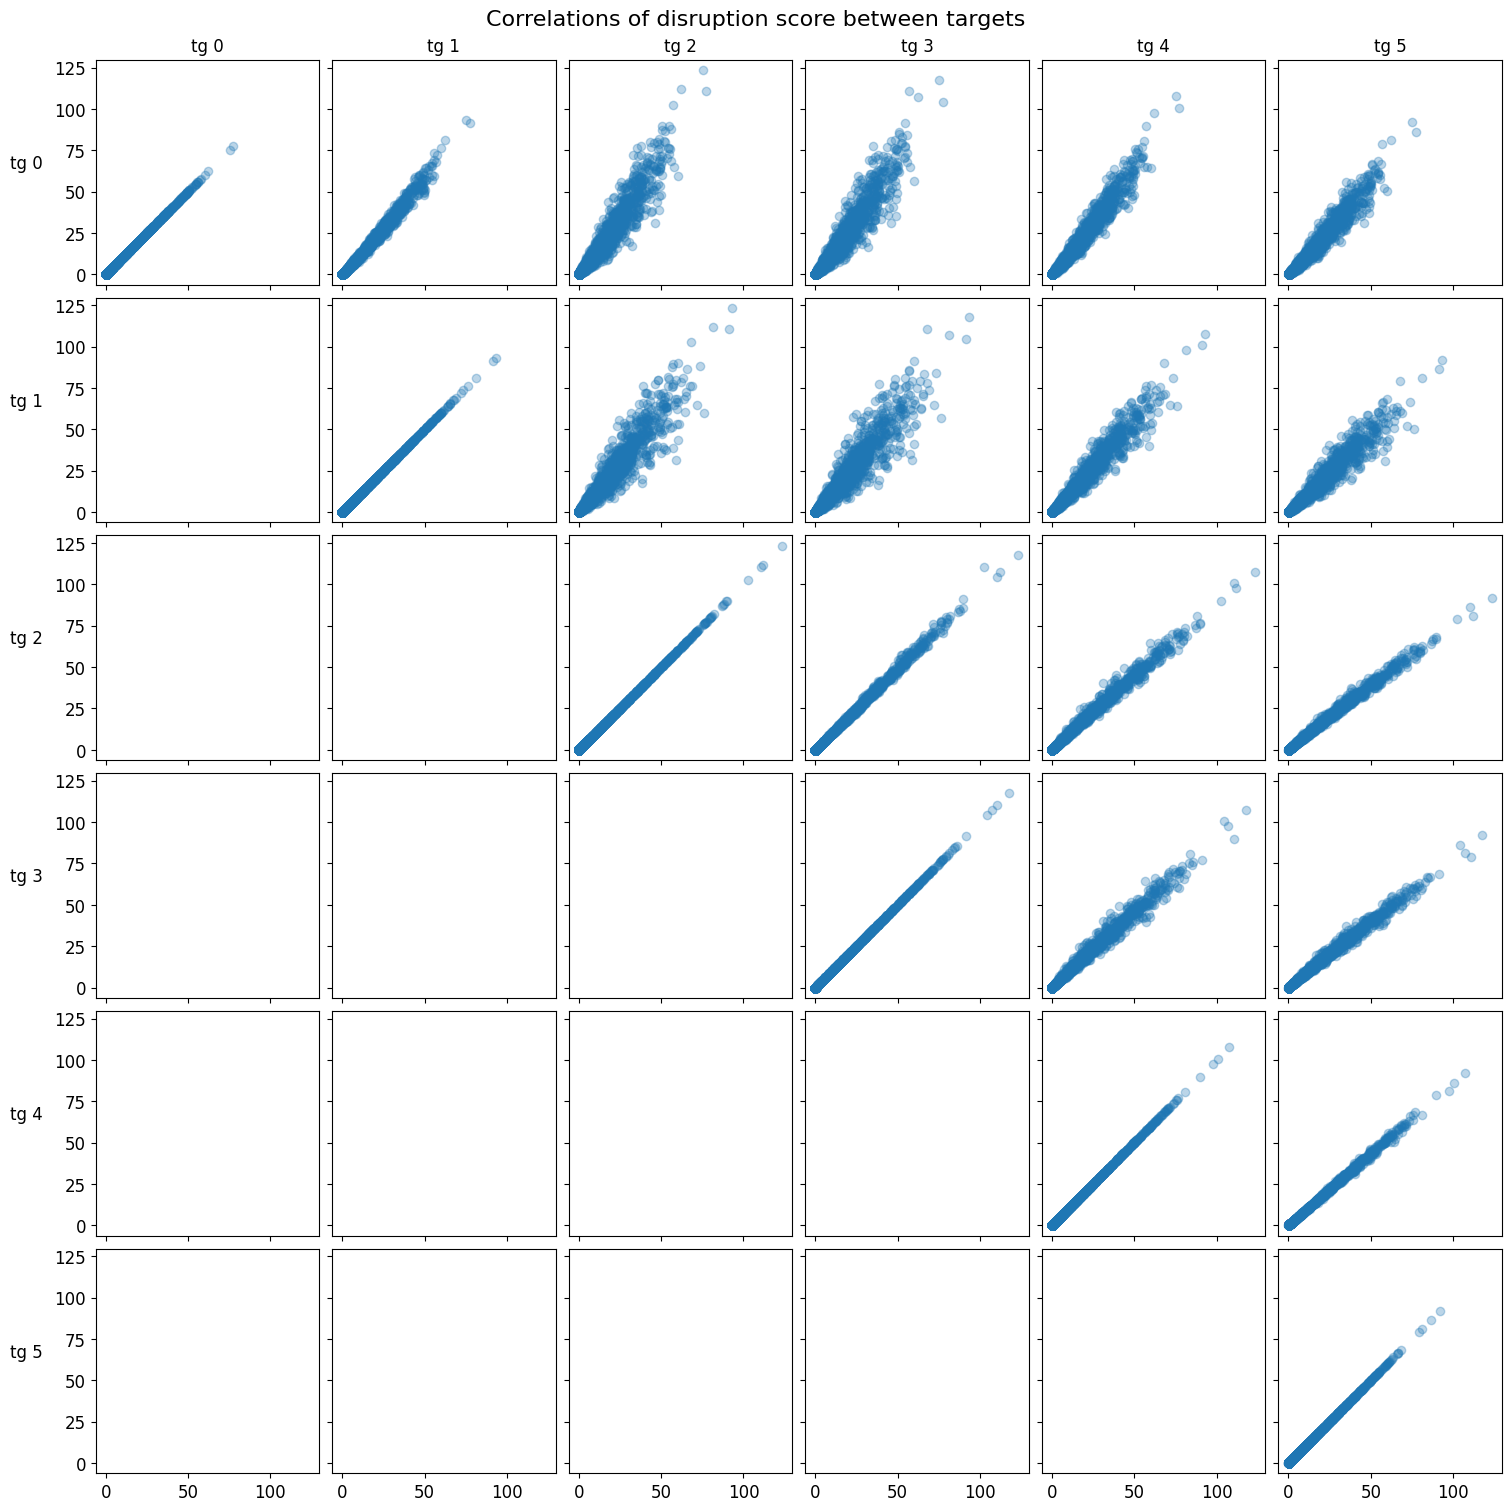

In [8]:
num_targets = 6
model_index = 0
targets_corr_summary = np.zeros((num_targets, num_targets))

fig, axs = plt.subplots(num_targets, num_targets, figsize=(15, 15), sharex=True, sharey=True, layout="constrained")

for target_index_x in range(num_targets):
    for target_index_y in range(num_targets):
        if (target_index_y >= target_index_x):
            
            stat_x = np.array(df_m0_perm_tg[f"{stat_of_analysis_interest}_h1_m{model_index}_t{target_index_x}"])
            stat_y = np.array(df_m0_perm_tg[f"{stat_of_analysis_interest}_h1_m{model_index}_t{target_index_y}"])
            
            axs[target_index_x, target_index_y].scatter(x=stat_x, y=stat_y, alpha=0.3)
            
            targets_corr_summary[target_index_x, target_index_y] = targets_corr_summary[target_index_y, target_index_x] = stats.pearsonr(stat_x, stat_y).statistic
            
names = [f"tg {i}" for i in range(num_targets)]

for ax, col in zip(axs[0], names):
    ax.set_title(col, size=12)

for ax, row in zip(
    axs[:, 0],
    names,
):
    ax.set_ylabel(row, rotation=0, fontsize=12, labelpad=20)
    
fig.suptitle(f"Correlations of disruption score between targets", fontsize=16)

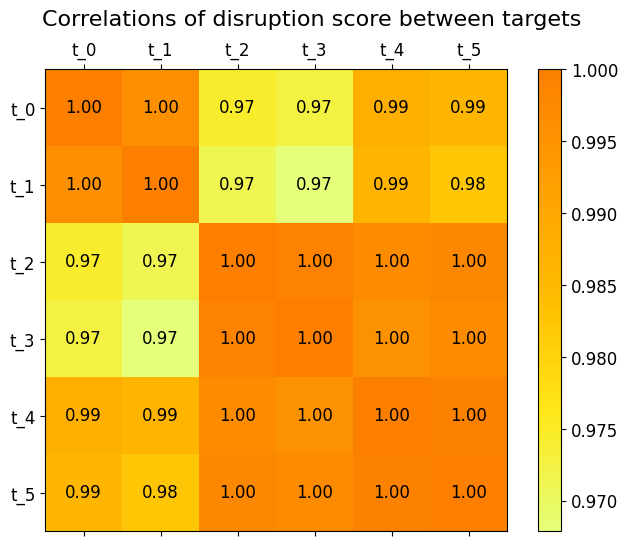

In [9]:
fig = plt.figure(figsize=(8, 6))

ax = fig.add_subplot(111)
cax = ax.matshow(targets_corr_summary, cmap="Wistia", interpolation='nearest')
fig.colorbar(cax)

names = [f"t_{i}" for i in range(num_targets)]

xaxis = np.arange(len(names))
ax.set_xticks(xaxis)
ax.set_yticks(xaxis)
ax.set_xticklabels(names)
ax.set_yticklabels(names)

for (x, y), value in np.ndenumerate(targets_corr_summary):
    plt.text(x, y, f"{value:.2f}", va="center", ha="center")

fig.suptitle(f"Correlations of disruption score between targets", fontsize=16)

fig.show()